In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the dataset from this link: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [ ]:
# Upload the file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Fundamentals_ML/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


###EDA (Exploratory Data Analysis)

In [ ]:
# Extract information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Check if there are missing values
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


There aren't missing values. Check the distribution for "categorical" columns.

In [ ]:
df['mainroad'].value_counts()

,count
mainroad,
yes,468
no,77


In [ ]:
df['guestroom'].value_counts()

,count
guestroom,
no,448
yes,97


In [ ]:
df['basement'].value_counts()

,count
basement,
no,354
yes,191


In [ ]:
df['hotwaterheating'].value_counts()

,count
hotwaterheating,
no,520
yes,25


In [ ]:
df['airconditioning'].value_counts()

,count
airconditioning,
no,373
yes,172


In [ ]:
df['prefarea'].value_counts()

,count
prefarea,
no,417
yes,128


In [ ]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


There are some features with object type that should transform in int. This is very important because machine learning algorithms work well with the numbers and not with strings. Only the 'furnishingstatus' feature has 3 values, all the others has two values (yes/no)



###Pre-Processing

In [ ]:
# Use the .replace() method to map Yes/No to 1/0
df = df.replace({'yes': 1, 'no': 0})

<ipython-input-57-310a2ac3542f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes': 1, 'no': 0})


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Use Ordinal Encoding in the 'furnishingstatus' feature
# Specify the order of the categories
furnishing_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}

# perform Ordinal Encoding on the 'furnishingstatus' column
df['furnishing_map'] = df['furnishingstatus'].map(furnishing_map)

In [ ]:
# Delete column furnishingstatus and use only 'furnishing_map' column
df = df.drop('furnishingstatus', axis=1)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_map
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
# Divide dependent variabile and indipendent variable
y = df['price']
X = df.drop('price', axis = 1)

In [ ]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
# Evaluate the size of target values to have more knowledge
y.max()

13300000

In [ ]:
y.min()

1750000

In [ ]:
print(f"{y.mean():.2f}")

4766729.25


In [ ]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_map
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


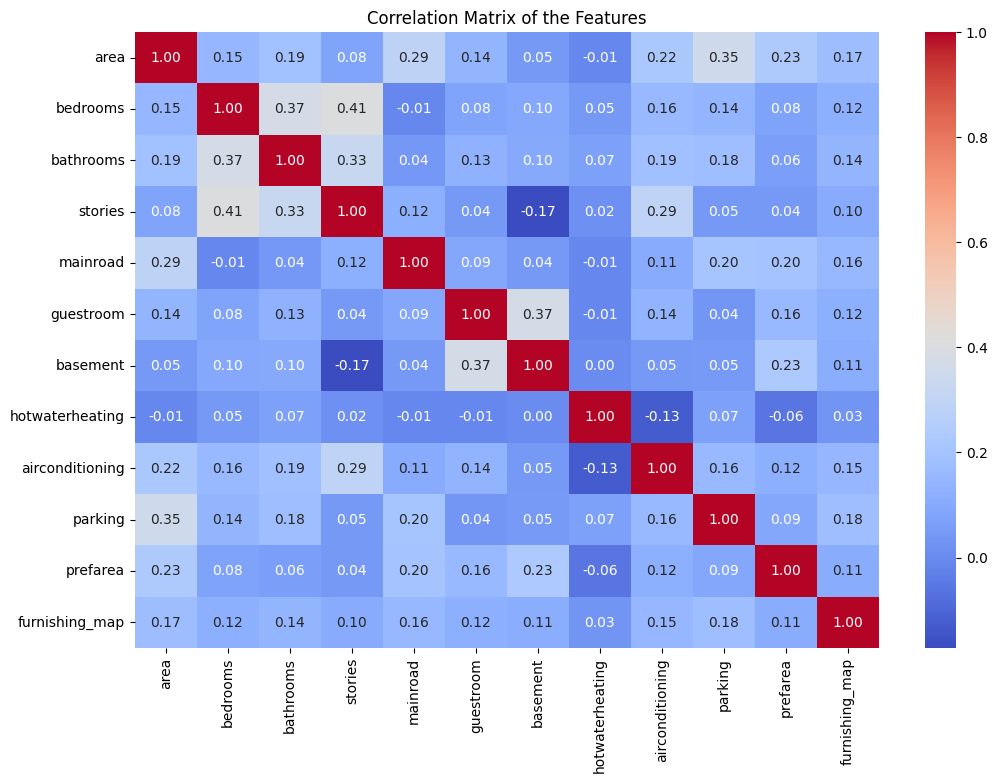

In [ ]:
# Calculate and visualyze the correlation matrix to detect multicollinearity
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of the Features")
plt.show()

There isn't multicollinearity. As we can see, no feature has a strong correlation with another feature.

In [ ]:
# Apply hold-out to divide the dataset in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Create a function to evaluate the models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluation_model(model, X_train, y_train, X_test, y_test):
  # Fit the model and predict unseen data
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  # Calculate the metrics
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, mae, r2

In [ ]:
# Create a function to apply cross-validation and standardization
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
def custom_cross_validation(model, X, y, cv=5, random_state=42):
  # Create the kf object
  kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
  # Create the dictionary to include the results
  scores_train = {"mse": [], "mae": [], "r2_score": []}

  # Convert both X and y to numpy arrays
  X = X.to_numpy()
  y = y.to_numpy()
  for train_index, val_index in kf.split(X):
    # Split the data for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Standardize -> fit on training fold, transform both training and validation fold
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    # Evaluate the model on train set
    mse, mae, r2 = evaluation_model(model, X_train_fold_scaled, y_train_fold, X_val_fold_scaled, y_val_fold)
    scores_train["mse"].append(mse)
    scores_train["mae"].append(mae)
    scores_train["r2_score"].append(r2)

  # Return dictionary and values for the metrics
  return scores_train

Cross-validation is a fundamental technique to reduce overfitting, while the standardization is a method that allow to have a balance dataset, so no feature has more weight respect than other. Another important thing is that the standardization "fit" must apply only with train data and no with the test data.

### Define and use the model Lasso

In [ ]:
# Define Lasso model
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)

In [ ]:
# Use the function custom_cross_validation to evaluate the model on train set
scores_lasso_train = custom_cross_validation(model_lasso, X_train, y_train, cv=5, random_state=42)
print("MSE lasso for train:", scores_lasso_train['mse'])
print("MAE lasso for train::", scores_lasso_train['mae'])
print("R2 lasso for train::", scores_lasso_train['r2_score'])

MSE lasso for train: [745315675243.5734, 1198843661923.5256, 1297522429910.925, 955127292285.6956, 1029204940200.652]
MAE lasso for train:: [659615.9036855735, 745022.7229450237, 860568.9259685525, 700946.9784983199, 763613.8026010534]
R2 lasso for train:: [0.6915810508948025, 0.6362336052113078, 0.6324242986185267, 0.7035109123347898, 0.6813402707575507]


In [ ]:
# Create pipeline for Lasso model (step 1 scaler, step 2 model lasso) to prevent data leakage
# Use GridSearchCV to evaluate several parameters
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Create pipeline
pipeline_lasso = Pipeline([
	('scaler', StandardScaler()),
	('model_lasso', Lasso())
])

# Define parameters dictionary
param_dist = {'model_lasso__alpha': [0.01, 0.1, 1, 10, 100] }

# Define GridSearch
search_lasso = GridSearchCV(pipeline_lasso, param_grid=param_dist)
# Train the model
search_lasso.fit(X_train, y_train)

print('Best R2 score   : ', search_lasso.best_score_)
print('Best parameters : ', search_lasso.best_params_)

Best R2 score   :  0.6265652447714297
Best parameters :  {'model_lasso__alpha': 100}


In [ ]:
# Find the best estimator:
best_lasso_pipeline = search_lasso.best_estimator_
best_lasso_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_lasso', Lasso(alpha=100))])

In [ ]:
# Predict test values with the best parameter
y_pred_lasso = best_lasso_pipeline.predict(X_test)

# Calculate metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("MSE lasso for test:", mse_lasso)
print("MAE lasso for test::", mae_lasso)
print("R2 lasso for test::", r2_lasso)

MSE lasso for test: 1535108692509.2913
MAE lasso for test:: 925546.8580401125
R2 lasso for test:: 0.6435278132104219


In [ ]:
# Recover the Lasso object inside the pipeline
model_lasso = best_lasso_pipeline.named_steps["model_lasso"]

# Save coefficients
coefficients = model_lasso.coef_
print(f"The coefficients are: \n{coefficients}")
# Check if there are some coefficients equal to zero and so it used the feature engineering
print("Numbers of coefficients: ", len(coefficients))
print("Numbers of coefficients different from zero: ", np.sum(coefficients != 0))

The coefficients are: 
[550252.38925513  62172.37897594 530072.10175695 358243.37396483
 140121.75750747 108808.24971562 232660.29070185 138155.16810872
 316528.80843927 254189.73167441 216338.90080769 149468.5762922 ]
Numbers of coefficients:  12
Numbers of coefficients different from zero:  12


All the feature are used.

###Define and use the model Ridge

In [ ]:
# Define Ridge model
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)

In [ ]:
# Use the function custom_cross_validation to evaluate the model on train set
scores_ridge_train = custom_cross_validation(model_ridge, X_train, y_train, cv=5, random_state=42)
print("MSE Ridge for train:", scores_ridge_train['mse'])
print("MAE Ridge for train::", scores_ridge_train['mae'])
print("R2 Ridge for train::", scores_ridge_train['r2_score'])

MSE Ridge for train: [745153989633.3232, 1198116027774.9082, 1297380123738.0945, 955430408563.8804, 1027928078978.9531]
MAE Ridge for train:: [659399.68205155, 744774.6339598392, 860382.2984230714, 700905.8661379033, 762989.4694308441]
R2 Ridge for train:: [0.691647957988877, 0.6364543920072634, 0.6324646125969853, 0.7034168194641313, 0.681735609173928]


In [ ]:
# Create pipeline for Ridge model (step 1 scaler, step 2 model ridge) to prevent data leakage
# Use GridSearchCV to evaluate several parameters
pipeline_ridge = Pipeline([
	('scaler', StandardScaler()),
	('model_ridge', Ridge())
])

# Define parameters dictionary
param_dist = {'model_ridge__alpha': [0.01, 0.1, 1, 10, 100] }

# Define GridSearch
search_ridge = GridSearchCV(pipeline_ridge, param_grid=param_dist)
# Train the model
search_ridge.fit(X_train, y_train)

print('Best R2 score   : ', search_ridge.best_score_)
print('Best parameters : ', search_ridge.best_params_)

Best R2 score   :  0.6290477152466487
Best parameters :  {'model_ridge__alpha': 100}


In [ ]:
# Find the best estimator:
best_ridge_pipeline = search_ridge.best_estimator_
best_ridge_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_ridge', Ridge(alpha=100))])

In [ ]:
# Predict test values with the best parameter
y_pred_ridge = best_ridge_pipeline.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("MSE Ridge for test:", mse_ridge)
print("MAE Ridge for test::", mae_ridge)
print("R2 Ridge for test::", r2_ridge)

MSE Ridge for test: 1575858807126.5781
MAE Ridge for test:: 926402.3391014348
R2 Ridge for test:: 0.6340651070578005


In [ ]:
# Recover the Ridge object inside the pipeline
model_ridge = best_ridge_pipeline.named_steps["model_ridge"]

# Save coefficients
coefficients = model_ridge.coef_
print(f"The coefficients are: \n{coefficients}")
# Check if there are some coefficients equal to zero and so it used the feature engineering
print("Numbers of coefficients: ", len(coefficients))
print("Numbers of coefficients different from zero: ", np.sum(coefficients != 0))

The coefficients are: 
[455798.70833236 122212.30240537 442177.39209558 289521.72826062
 148943.94053451 125663.90926641 178107.64970029 110133.24252998
 291700.86575939 237810.48221266 192488.96564681 151098.327715  ]
Numbers of coefficients:  12
Numbers of coefficients different from zero:  12


All the feature are used.

###Define and use the model Elastic Net

In [ ]:
# Define Elastic Net model
from sklearn.linear_model import ElasticNet
model_eNet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [ ]:
# Use the function custom_cross_validation to evaluate the model on train set
scores_eNet_train = custom_cross_validation(model_eNet, X_train, y_train, cv=5, random_state=42)
print("MSE ElasticNet for train:", scores_eNet_train['mse'])
print("MAE ElasticNet for train::", scores_eNet_train['mae'])
print("R2 ElasticNet for train::", scores_eNet_train['r2_score'])

MSE ElasticNet for train: [787663031539.5991, 1257876966822.3313, 1365567519343.4902, 1064080123080.0754, 1021768233898.3585]
MAE ElasticNet for train:: [655551.6655477348, 766046.274604654, 866787.6986857029, 719929.8058860853, 741043.2183528915]
R2 ElasticNet for train:: [0.6740572987988396, 0.6183210673404025, 0.6131477752250487, 0.6696899487190782, 0.6836428042221514]


In [ ]:
# Create pipeline for ElasticNet model (step 1 scaler, step 2 model ElasticNet) to prevent data leakage
# Use GridSearchCV to evaluate several parameters
pipeline_eNet = Pipeline([
	('scaler', StandardScaler()),
	('model_eNet', ElasticNet())
])

# Define parameters dictionary
param_dist = {'model_eNet__alpha': [0.01, 0.1, 1, 10, 100],
              'model_eNet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

# Define GridSearch
search_eNet = GridSearchCV(pipeline_eNet, param_grid=param_dist)
# Train the model
search_eNet.fit(X_train, y_train)

print('Best R2 score   : ', search_eNet.best_score_)
print('Best parameters : ', search_eNet.best_params_)

Best R2 score   :  0.6312936242002964
Best parameters :  {'model_eNet__alpha': 1, 'model_eNet__l1_ratio': 0.9}


In [ ]:
# Find the best estimator:
best_eNet_pipeline = search_eNet.best_estimator_
best_eNet_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_eNet', ElasticNet(alpha=1, l1_ratio=0.9))])

In [ ]:
# Predict test values with the best parameter
y_pred_eNet = best_eNet_pipeline.predict(X_test)

# Calculate metrics
mse_eNet = mean_squared_error(y_test, y_pred_eNet)
mae_eNet = mean_absolute_error(y_test, y_pred_eNet)
r2_eNet = r2_score(y_test, y_pred_eNet)

print("MSE ElasticNet for test:", mse_eNet)
print("MAE ElasticNet for test::", mae_eNet)
print("R2 ElasticNet for test::", r2_eNet)

MSE ElasticNet for test: 1540756529002.272
MAE ElasticNet for test:: 921806.7970831874
R2 ElasticNet for test:: 0.6422163121843989


In [ ]:
# Recover the ElasticNet object inside the pipeline
model_eNet = best_eNet_pipeline.named_steps["model_eNet"]

# Save coefficients
coefficients = model_eNet.coef_
print(f"The coefficients are: \n{coefficients}")
# Check if there are some coefficients equal to zero and so it used the feature engineering
print("Numbers of coefficients: ", len(coefficients))
print("Numbers of coefficients different from zero: ", np.sum(coefficients != 0))

The coefficients are: 
[507658.27832838  93985.77621361 491599.77039518 324872.18500935
 146422.98831894 119135.83143101 205805.56988323 126150.95387404
 307721.94792998 248307.08097443 206512.10070494 151448.49931898]
Numbers of coefficients:  12
Numbers of coefficients different from zero:  12


We have a target with big numerical number (represent the price of house with milions) for this, the mse metric isn't good for this target. The mae metric is better for this project and we have a error about 0.9 milion. Futhermore, in all models are used all the features (without lead weights to zero).

### See the performance of the models across graphs

In [ ]:
# Dictionary with MAE and R² for each model
performance_data = {
    "MAE": [mae_lasso, mae_ridge, mae_eNet],
    "R²": [r2_lasso, r2_ridge, r2_eNet]
}

model_names = ["Lasso", "Ridge", "ElasticNet"]

# Create and visualyze dataframe
performance_df = pd.DataFrame(performance_data, index=model_names)
print(performance_df)

                      MAE        R²
Lasso       925546.858040  0.643528
Ridge       926402.339101  0.634065
ElasticNet  921806.797083  0.642216


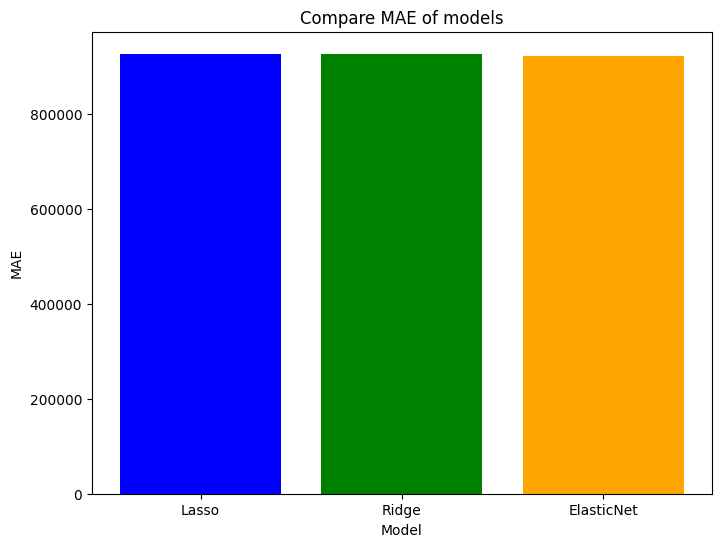

In [ ]:
# Barplot for comparing MAE of models
models = ['Lasso', 'Ridge', 'ElasticNet']
mae_values = [mae_lasso, mae_ridge, mae_eNet]

# Size of figure
plt.figure(figsize=(8, 6))
# Create the barplot
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Compare MAE of models')
plt.show()

The Elastic Net model has a lower MAE than the others but the values ​​are similar

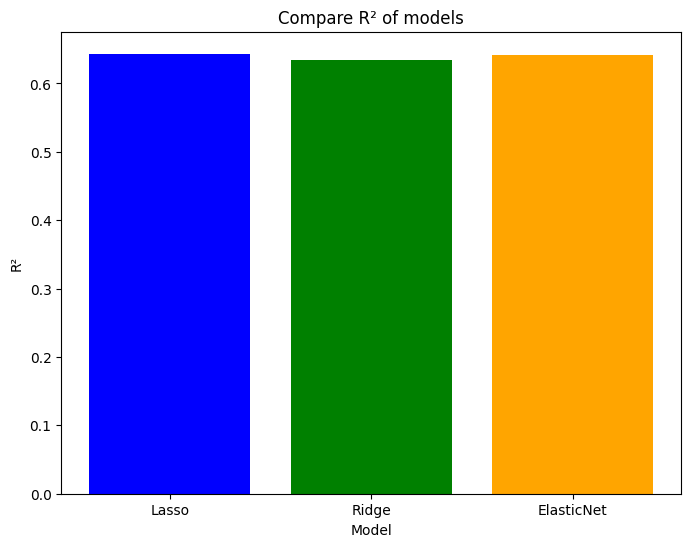

In [ ]:
# Barplot for comparing R² of models
models = ['Lasso', 'Ridge', 'ElasticNet']
r2_values = [r2_lasso, r2_ridge, r2_eNet]

# Create the barplot
plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('R²')
plt.title('Compare R² of models')
plt.show()

The best model is Lasso but it is similar with ElasticNet

In [ ]:
# Calculate the residual for lasso
residual = y_test - y_pred_lasso
print(f"Max error (in positive): {residual.max()}")
print(f"Max error (in negative): {residual.min()}")

Max error (in positive): 5279495.705979472
Max error (in negative): -3024905.671225829


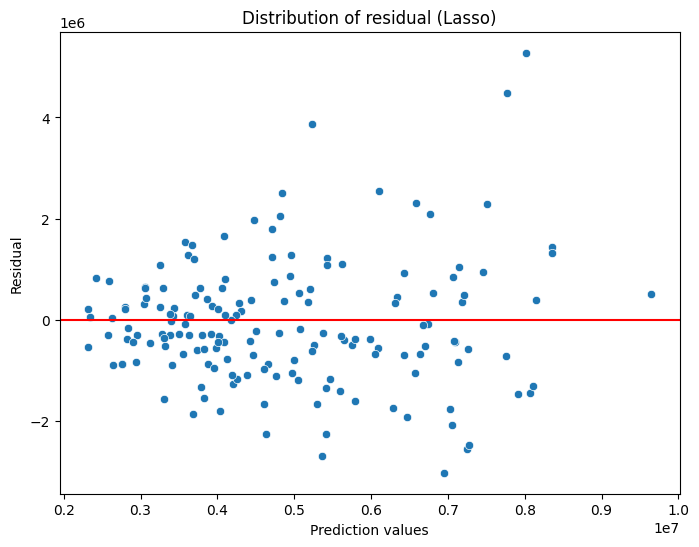

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_lasso, y=residual)
plt.xlabel('Prediction values')
plt.ylabel('Residual')
plt.title('Distribution of residual (Lasso)')
plt.axhline(0, color='red')  # line to have a reference
plt.show()

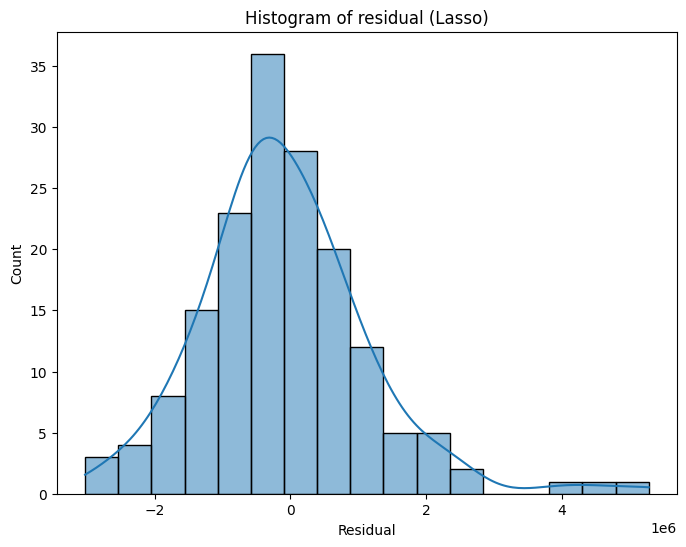

In [ ]:
# Create a histogram to see the distribution of residual
plt.figure(figsize=(8, 6))
sns.histplot(residual, kde=True)
plt.xlabel('Residual')
plt.title('Histogram of residual (Lasso)')
plt.show()